# INFLATION AND FERTILITY (MANGLER TEKST TIL FERTILITET)
### Motivation
This dataproject aims to describe the change in fertility and inflation have over time. Understanding this dynamic is crucial in understand the underlying trends and how policies have affected the economy over time.

Inflation rates, which describes price levels in the econony, can be interpreted as the a measuerement of health for the economy. High inflation can indicate economic instability, which affects everything from consumer purchasing power to investments in the economy. Conversely, low inflation present the economic predictability and the potential growth rate. By tracking inflation trends, policymakers can assess the effectiveness of the monetary policy and adjust it accordingly.

Fertility rates, which is defined as the  number of children born per woman, offers essential insights into demographic shifts and social impact. Changes in fertility rates can potentially influence population growth, age distribution, and workforce dynamics. Low fertility rates can lead to an aging population, thereby affecting pension systems and the social system. We assume that policymakers rely on fertility data to plan the needs in the economy.

We extended our original project by dividing the the fertility in different age groups, which are 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49. We also run a regression on fertility for the specific age group, GDP and FPI, in order to find a correlation between the variables.


In conclusion, by examining inflation and fertility trends over time, we gain a  understanding of economic resilience, demographic shifts, and the interconnectedness of economic and social policies. Which can be used by policymakers to improve the chosen policy, in turn increasing the growth rates and ensuring sustainable welfare in the economy.


We have used a rather long period (1995-2023) so we can perform OLS estimation on our dataset. For this we have sorted the years selected.


### The setup
For this project we use Statistisk-banken to get a comprehensive overview of the avaliable data of the danish economy. The variables are: CPI, GDP and the Fertility Rate
- The Consumer Price Index is used as a proxy for the inflation and represents the average change over time in prices paid by consumers for a variety of goods and services, thereby reflecting inflationary pressures in the economy. 

- The GDP represents the total monetary value of all goods and services produced within Denmark's borders over a specific period, serving as a measure of economic output and can therefore be a measurement of economic growth. 

- The fertility rate represents the average number of children born per woman, which provides insight into population growth pattern and the demographic trends.

Note that this study does not look at the causality between the variables. The study has more of a descriptibe nature.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Notes: 

We do not use the dataproject.py as we feel the datasorting and merging is essential in understanding this dataproject , all the while displaying our thought process in this assignment.

For the "FOD33" we have retrieved the data through excel and inserted it into our dataproject, hence the Api only registers "TID" and "ALDER" as variables but not the fertility, this variable is essential is thus retrieved "manually", despite the datacleaning being done in this project.

Furthermore in regard to the Regressions we have precompiled manually, otherwise python would not read it. We argue that the method is the same as the merging done in the merger part of the project, and that there therefore is not missing any dimension of understanding, in this project..

The below code imports and sets the magics for the projects.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import statsmodels.api as sm
import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import plotly.express as px
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# for the excel data
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('data/')
assert os.path.isfile('data/bog1.xlsx')


# Print everything in data
os.listdir('data/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['.DS_Store', 'BOG1.xlsx', 'ferrrr.xlsx']

# Read and clean data

We import the data, both through an API and manually and then we load it. 

In [67]:
fert = DstApi('FERT1')
gdp = DstApi('NAN1')
fpi = DstApi ('PRIS112')

We have now imported our desired variables and it is time to clean the data. The below code displays the total fertillity rate for women in the age of 15-47, by ancestry and time.

In [68]:
tabsum_fert= fert.tablesummary(language='en')
display(tabsum_fert)


Table FERT1: Total fertility rate (ages 15-49) by ancestry and time
Last update: 2024-02-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,HERKOMST,6,AK,All women,DKK,Women of Danish origin,False
1,Tid,38,1986,1986,2023,2023,True


In [69]:
# The available values for a each variable: 
for variable in tabsum_fert['variable name']:
    print(variable+':')
    display(fert.variable_levels(variable, language='en'))

HERKOMST:


,id,text
0,AK,All women
1,IKV,Immigrant women from western countries
2,IKIV,Immigrant women from non-western countries
3,EKV,Descendant women from western countries
4,EKIV,Descendant women from non-western countries
5,DKK,Women of Danish origin


Tid:


,id,text
0,1986,1986
1,1987,1987
2,1988,1988
3,1989,1989
4,1990,1990
5,1991,1991
6,1992,1992
7,1993,1993
8,1994,1994
9,1995,1995


The below code provides a range of tabels, which displays demand and supply by transaction, price unit, time, all variable ID's and their descriptionis is displayed.

In [70]:
tabsum_gdp= gdp.tablesummary(language='en')
display(tabsum_gdp)
for var in tabsum_gdp['variable name']:
    print(var+':')
    display(gdp.variable_levels(var, language='en'))


Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2024-06-28T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,31,B1GQK,B.1*g Gross domestic product,EMPM_DC,"Total employment (1,000 persons)",False
1,PRISENHED,6,V_M,"Current prices, (bill. DKK.)",LAN_C,"Pr. capita, 2020-prices, chained values, (1000...",False
2,Tid,58,1966,1966,2023,2023,True


TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,LAN_M,"2020-prices, chained values, (bill. DKK.)"
2,L_V,Period-to-period real growth (per cent)
3,V_C,"Pr. capita. Current prices, (1000 DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LAN_C,"Pr. capita, 2020-prices, chained values, (1000..."


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


In [71]:
tabsum_fpi= fpi.tablesummary(language='en')
display(tabsum_fpi)
for var in tabsum_fpi['variable name']:
    print(var+':')
    display(fpi.variable_levels(var, language='en'))


Table PRIS112: Consumer price index by main figures and time
Last update: 2024-01-10T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,HOVED,2,1005,"Average, yearly",1010,Annual increase,False
1,Tid,44,1980,1980,2023,2023,True


HOVED:


,id,text
0,1005,"Average, yearly"
1,1010,Annual increase


Tid:


,id,text
0,1980,1980
1,1981,1981
2,1982,1982
3,1983,1983
4,1984,1984
5,1985,1985
6,1986,1986
7,1987,1987
8,1988,1988
9,1989,1989


To provide an overview of the avaliable datapoints, the below code is used. 

In [72]:
params = fert.define_base_params(language='en')
params

{'table': 'fert1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HERKOMST', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [73]:
params ={'table': 'fert1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HERKOMST', 'values': ['AK']},
  {'code': 'Tid', 'values': ['>1990<=2023']}]}

In [74]:
fert_api = fert.get_data(params=params)
fert_api.head(15)

,HERKOMST,TID,INDHOLD
0,All women,1991,1684.4
1,All women,1992,1764.8
2,All women,1993,1751.2
3,All women,1994,1809.1
4,All women,1995,1809.7
5,All women,1996,1753.5
6,All women,1997,1756.2
7,All women,1998,1725.2
8,All women,1999,1738.3
9,All women,2000,1774.2


In [75]:
params = gdp.define_base_params(language='en')
params

{'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['*']},
  {'code': 'PRISENHED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [76]:
params ={'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT', 'values': ['B1GQK']},
  {'code': 'PRISENHED', 'values': ['V_M']},
  {'code': 'Tid', 'values': ['>1990<=2023']}]}

In [77]:
gdp_api = gdp.get_data(params=params)
gdp_api.head(15)

,TRANSAKT,PRISENHED,TID,INDHOLD
0,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2014,1980.3
1,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",1996,1087.1
2,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2013,1935.6
3,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2015,2030.2
4,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2006,1685.2
5,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",1999,1241.0
6,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2002,1411.5
7,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2012,1892.9
8,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2007,1743.1
9,B.1*g Gross domestic product,"Current prices, (bill. DKK.)",2008,1809.7


In [78]:
params = fpi.define_base_params(language='en')
params

{'table': 'pris112',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HOVED', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [79]:
params = {'table': 'pris112',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'HOVED', 'values': ['1005']},
  {'code': 'Tid', 'values': ['>1990<=2023']}]}

In [80]:
fpi_api = fpi.get_data(params=params)
fpi_api.head(15)

,HOVED,TID,INDHOLD
0,"Average, yearly",1991,63.2
1,"Average, yearly",1992,64.5
2,"Average, yearly",1993,65.3
3,"Average, yearly",1994,66.6
4,"Average, yearly",1995,68.0
5,"Average, yearly",1996,69.5
6,"Average, yearly",1997,71.0
7,"Average, yearly",1998,72.3
8,"Average, yearly",1999,74.1
9,"Average, yearly",2000,76.2


We have now found the desired data for the average yearly fertility for the age groups 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, which we now merge it into one dataset.

The excel datasheet, containing the average fertility for the age groups is extracted:

In [81]:
filename = 'data/ferrrr.xlsx' # open the file and have a look at it
pd.read_excel(filename).head(10)
fertreg = pd.read_excel(filename, skiprows=0)
fertreg.rename(columns = {'Unnamed: 0':'Year'}, inplace=True)

In [82]:
filename = 'data/BOG1.xlsx' # open the file and have a look at it


In [83]:
fertAlt = pd.read_excel(filename, skiprows=2)
fertAlt.drop(columns=[str(i) for i in range(1973, 1994)], inplace=True)
fertAlt.rename(columns = {'Unnamed: 0':'Age group'}, inplace=True)

In [84]:
col_dict = {}
for i in range(1994, 2023+1): # range goes from 2010 to 2023
    col_dict[str(i)] = f'fertAlt{i}'

col_dict = {str(i) : f'fertAlt{i}' for i in range(1991,2023+1)}
col_dict

{'1991': 'fertAlt1991',
 '1992': 'fertAlt1992',
 '1993': 'fertAlt1993',
 '1994': 'fertAlt1994',
 '1995': 'fertAlt1995',
 '1996': 'fertAlt1996',
 '1997': 'fertAlt1997',
 '1998': 'fertAlt1998',
 '1999': 'fertAlt1999',
 '2000': 'fertAlt2000',
 '2001': 'fertAlt2001',
 '2002': 'fertAlt2002',
 '2003': 'fertAlt2003',
 '2004': 'fertAlt2004',
 '2005': 'fertAlt2005',
 '2006': 'fertAlt2006',
 '2007': 'fertAlt2007',
 '2008': 'fertAlt2008',
 '2009': 'fertAlt2009',
 '2010': 'fertAlt2010',
 '2011': 'fertAlt2011',
 '2012': 'fertAlt2012',
 '2013': 'fertAlt2013',
 '2014': 'fertAlt2014',
 '2015': 'fertAlt2015',
 '2016': 'fertAlt2016',
 '2017': 'fertAlt2017',
 '2018': 'fertAlt2018',
 '2019': 'fertAlt2019',
 '2020': 'fertAlt2020',
 '2021': 'fertAlt2021',
 '2022': 'fertAlt2022',
 '2023': 'fertAlt2023'}

In [85]:
fertAlt.rename(columns = col_dict, inplace=True)
fertAlt.head(7)

,Age group,fertAlt1994,fertAlt1995,fertAlt1996,fertAlt1997,fertAlt1998,fertAlt1999,fertAlt2000,fertAlt2001,fertAlt2002,...,fertAlt2014,fertAlt2015,fertAlt2016,fertAlt2017,fertAlt2018,fertAlt2019,fertAlt2020,fertAlt2021,fertAlt2022,fertAlt2023
0,15-19,6.32,5.86,5.52,5.86,5.46,5.42,5.58,5.30,4.42,...,2.40,2.28,2.52,1.84,1.60,1.30,1.12,0.90,0.72,0.78
1,20-24,55.42,54.34,52.78,49.48,47.96,46.92,45.94,45.44,42.20,...,29.08,29.02,29.80,28.90,26.08,23.56,20.48,18.98,17.08,15.40
2,25-29,137.22,135.14,128.54,127.08,121.78,120.52,122.02,119.34,116.06,...,102.14,102.66,107.44,104.20,101.36,99.56,97.12,97.68,86.82,81.52
3,30-34,113.86,115.50,112.84,115.52,116.10,118.50,123.52,121.08,122.08,...,126.40,130.00,133.20,131.94,131.90,130.76,130.62,135.60,123.10,120.40
4,35-39,42.18,44.10,43.60,45.64,45.96,48.26,49.02,48.94,50.76,...,63.70,64.06,68.78,67.16,67.96,67.94,68.54,73.30,65.44,63.66
5,40-44,6.54,6.80,7.20,7.42,7.52,7.78,8.44,8.60,9.08,...,13.86,13.90,14.54,15.44,16.04,15.68,15.96,17.08,16.00,15.98
6,45-49,0.26,0.20,0.28,0.30,0.34,0.26,0.28,0.32,0.36,...,0.72,0.74,0.86,0.94,0.96,1.14,1.12,1.28,1.38,1.42


Here we apply data cleaning so the data can be read.

## Merging

We nowmerge our three data sets into one. This way, the variables from the dataset can later be graphed.

In [86]:
# Merge fpi_api and fert_api on 'TID'
merged_first = pd.merge(fpi_api, fert_api, on='TID', how='inner')


In [87]:
# Now merge the result with gdp_api on 'TID'
final_merged = pd.merge(merged_first, gdp_api, on='TID', how='inner')


In [88]:
merged_first.rename(columns={
    'INDHOLD_x': 'FertilityRate',
    'INDHOLD_y': 'ConsumerPriceIndex'
}, inplace=True)

# Assuming gdp_api has been loaded and contains a column that should be renamed to 'GrossDomesticProduct'
gdp_api.rename(columns={
    'INDHOLD': 'GrossDomesticProduct'
}, inplace=True)

# Merge the result with gdp_api on 'TID'
final_merged = pd.merge(merged_first, gdp_api, on='TID', how='inner')

# Select only the desired columns
final_selected = final_merged[['TID', 'FertilityRate', 'ConsumerPriceIndex', 'GrossDomesticProduct']]


In [89]:
# Convert columns to numeric, handling non-convertible values
final_selected.loc[:, 'FertilityRate'] = pd.to_numeric(final_selected['FertilityRate'], errors='coerce')
final_selected.loc[:, 'ConsumerPriceIndex'] = pd.to_numeric(final_selected['ConsumerPriceIndex'], errors='coerce')
final_selected.loc[:, 'GrossDomesticProduct'] = pd.to_numeric(final_selected['GrossDomesticProduct'], errors='coerce')

# Calculate year-over-year percentage changes
final_selected.loc[:, 'FertilityRate_Pct_Change'] = final_selected['FertilityRate'].pct_change() * 100
final_selected.loc[:, 'ConsumerPriceIndex_Pct_Change'] = final_selected['ConsumerPriceIndex'].pct_change() * 100
final_selected.loc[:, 'GrossDomesticProduct_Pct_Change'] = final_selected['GrossDomesticProduct'].pct_change() * 100


/var/folders/7b/kjzr2kfx2dd1zs1nsw38qrbc0000gn/T/ipykernel_2360/2465816959.py:7: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/7b/kjzr2kfx2dd1zs1nsw38qrbc0000gn/T/ipykernel_2360/2465816959.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7b/kjzr2kfx2dd1zs1nsw38qrbc0000gn/T/ipykernel_2360/2465816959.py:8: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future beha

## Drawing the Graphs

Now that the dataset is merged, we draw histograms, which display the fertility rate in the years, 1995, 2005, 2015 and 2020, for all the previously defined age groups.

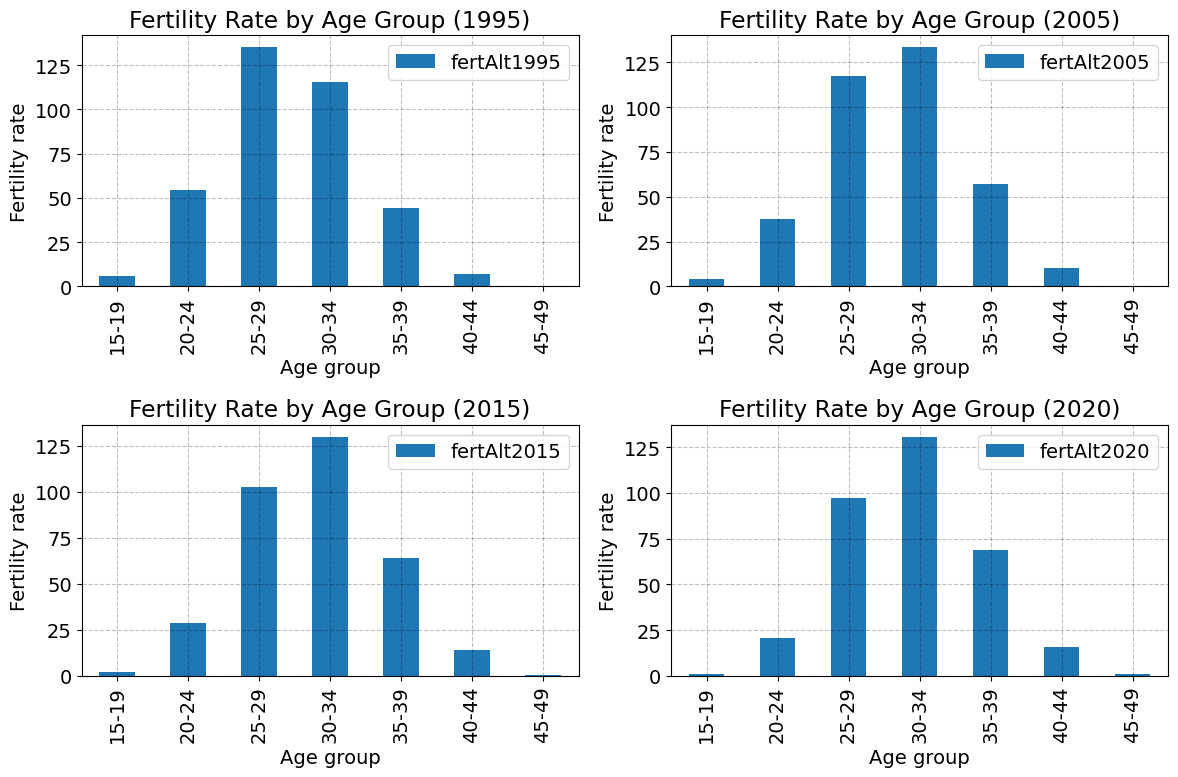

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

fertAlt[['Age group', 'fertAlt1995']].plot(x='Age group', y='fertAlt1995', kind='bar', ax=axes[0, 0])
axes[0, 0].set_xlabel('Age group')
axes[0, 0].set_ylabel('Fertility rate')
axes[0, 0].set_title('Fertility Rate by Age Group (1995)')

fertAlt[['Age group', 'fertAlt2005']].plot(x='Age group', y='fertAlt2005', kind='bar', ax=axes[0, 1])
axes[0, 1].set_xlabel('Age group')
axes[0, 1].set_ylabel('Fertility rate')
axes[0, 1].set_title('Fertility Rate by Age Group (2005)')

fertAlt[['Age group', 'fertAlt2015']].plot(x='Age group', y='fertAlt2015', kind='bar', ax=axes[1, 0])
axes[1, 0].set_xlabel('Age group')
axes[1, 0].set_ylabel('Fertility rate')
axes[1, 0].set_title('Fertility Rate by Age Group (2015)')

fertAlt[['Age group', 'fertAlt2020']].plot(x='Age group', y='fertAlt2020', kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Age group')
axes[1, 1].set_ylabel('Fertility rate')
axes[1, 1].set_title('Fertility Rate by Age Group (2020)')

plt.tight_layout()
plt.show()

We print the actual values, since it is a great way to compare different years. Furthermore, the values are used to draw a graph, displaying the year-over-year percantage change in the fertility rate, GDP and CPI. The graph is interactive and can display all the mentioned variables or selected ones. 

In [91]:
ct_change_df = final_selected[['TID', 'FertilityRate_Pct_Change', 'ConsumerPriceIndex_Pct_Change', 'GrossDomesticProduct_Pct_Change']]
pct_change_df = pct_change_df.iloc[1:].reset_index(drop=True)


print("Year-Over-Year Percentage Changes (Preview):")
print(pct_change_df.head(40).to_string(index=False))

Year-Over-Year Percentage Changes (Preview):
 TID  FertilityRate_Pct_Change  ConsumerPriceIndex_Pct_Change  GrossDomesticProduct_Pct_Change
1993                  1.240310                      -0.770626                         0.498213
1994                  1.990812                       3.306304                         6.951180
1995                  2.102102                       0.033166                         4.353083
1996                  2.205882                      -3.105487                         4.972963
1997                  2.158273                       0.153978                         5.252507
1998                  1.830986                      -1.765175                         3.583290
1999                  2.489627                       0.759332                         4.708066
2000                  2.834008                       2.065236                         6.849315
2001                  2.362205                      -1.645812                         3.491704
2002 

In [92]:
# Create an interactive line plot with Plotly
fig = px.line(final_selected, x='TID', y=[
    'FertilityRate_Pct_Change', 'ConsumerPriceIndex_Pct_Change', 'GrossDomesticProduct_Pct_Change'],
    labels={
        'value': 'Percentage Change (%)',
        'variable': 'Metrics',
        'TID': 'Year'
    },
    title='Year-over-Year Percentage Change'
)

# Update layout for clearer display
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Percentage Change',
    legend_title='Metric'
)

# Show the plot
fig.show()




If our interactive graph cant load, we have also created a simple sketch using matplot package, by removing the "#" but we advise to use the interactive figure, as you can isolate each metric.

In [93]:
#plt.figure(figsize=(10, 6))
#plt.plot(final_selected['TID'], final_selected['FertilityRate_Pct_Change'], label='Fertility Rate % Change', marker='o')
#plt.plot(final_selected['TID'], final_selected['ConsumerPriceIndex_Pct_Change'], label='Consumer Price Index % Change', marker='x')
#plt.plot(final_selected['TID'], final_selected['GrossDomesticProduct_Pct_Change'], label='Gross Domestic Product % Change', marker='^')
#plt.xlabel('Year')
#plt.ylabel('Percentage Change (%)')
#plt.title('Year-over-Year Percentage Change')
#plt.legend()
#plt.grid(True)

#plt.show()

# Ordinary Least Squares

Finally we run a number of OLS on the fertility rate the CPI and the GDP in order to see how they affect each other and to see if a potential correlation can be found.
The first regression is for the total fertility, wheras the second regression is for the youngest age group. The third and final regression is for the group with the highest fertility.

In [94]:
### 1
# Define the dependent variable 'y' and independent variables 'X'
y = fertreg['FERTILITY']
X = fertreg[['GDP', 'CPI']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)


# Fit the model
model1 = sm.OLS(y, X).fit()


# Print out the statistics
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:              FERTILITY   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     5.778
Date:                Mon, 26 Aug 2024   Prob (F-statistic):            0.00678
Time:                        10:34:23   Log-Likelihood:                -223.00
No. Observations:                  38   AIC:                             452.0
Df Residuals:                      35   BIC:                             456.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.2597    196.715      5.400      0.0

In [95]:
### 2

# Define the dependent variable 'y' and independent variables 'X'
y = fertreg['15-19']
X = fertreg[['GDP', 'CPI']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the model
model2 = sm.OLS(y, X).fit()

# Print out the statistics
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  15-19   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     450.0
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.08e-25
Time:                        10:34:23   Log-Likelihood:                -16.263
No. Observations:                  38   AIC:                             38.53
Df Residuals:                      35   BIC:                             43.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8298      0.853     11.519      0.0

In [96]:
### 3
# Define the dependent variable 'y' and independent variables 'X'
y = fertreg['30-34']
X = fertreg[['GDP', 'CPI']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the model
model3 = sm.OLS(y, X).fit()

# Print out the statistics
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  30-34   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     40.38
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           8.11e-10
Time:                        10:34:23   Log-Likelihood:                -138.80
No. Observations:                  38   AIC:                             283.6
Df Residuals:                      35   BIC:                             288.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9365     21.459     -0.230      0.8

## Analysis:

For this Data-project we have conducted a simple analysis of three variables from Statisk-banken. We have utilised a common tool from the descriptive economics course where we look at the yearly percentage change in a variable, and are thus able to compare the data to see how the variables changes within the analytic period.

Furthermore we have looked at how the age groups have evolved over time. In order to conclude on the data project we have ran three regression to see if we can detect a correlation between the variables.


#### What does the box diagram show?

We observe that there is a shift in who has the highest fertility in the four samples, we observe, that in 1995, it is the age group 25-29 who has the highest fertility and in the rest of the sample we find that the age group 30-34 has the highest fertility, where the age group 25-29 consistently is declining. Almost in all periods we observe that the age group 15-19 and 45-49 has the lowest fertility on almost around 0.0, thus we find it intersting to see if we can run a number of simple regression and observe if our two variables can affect these changes.

#### What does the graph show?

The Gross Domestic Product reflects the economic output and growth over time.
- The Gross Domestic Product starts with an yearly increase of 5 pct. points. after adjusting to a 2.0 pct. points. in the period 2001-2003. from 2004 to 2008 we see a yearly increase on around 5.0 to 3.0 pct. points. where as in 2009 we see decrease on -4.4 pct. points. this is caused by the financial crisis. followed the next year 2010 with an increase on 4.8 pct points. Onwards we see an increase of around 2.0 pct. points, which increases each year with the exception of 2016-2017 followed by a sharp decling in 2020 where it only increases with 0,5 pct, followed by a boom in 2021-2022 where it increases by 9.0-11.0 pct.points. - Overall this draws a picture of a stable economy recovering from the financial crisis with a boom in 2021-2022.

The Consumer Price Index tracks changes in the cost of living and inflationary pressures.
- The Consumer Price Index change is more volatile. This is evident in the period 1995-1996 where it starts off with -3.1 pct. points. and bounces back on an increase on 0.15 pct. points. this volatiltiy describes the whole period up to 2010 where it bounces between a negative and positve value. It experiences a significant drop around 2011, a rise peaking in 2012, and then falls again sharply by 2023. The most notable point is the extreme dip in 2022, indicating a period of deflation or significant price decreases, followed by a recovery in 2023.
- Overall we can see that the covid crisis had a massive effect on the consumer prices during the crisis, while the financial crisis had effects after the crisis.

The Fertility Rate provides insights into demographic trends and societal responses.
- Fertility seems stable compared to the others, with fluctuations remaining within a narrower range. but with a steady decline wheras the first period from 1995-2003 we see an yearly increaseover 2.0 pct. points. whereas in 2004-2009 we only see an increase by 1 pct. point. with the exception of 2008 we see a fertility increase by 3.0 pct. points. in 2010-2013 we can see an increase by 2.0-3.0 pct. points. We observe around the years 2014-2015, after which it stabilizes and shows an upward trend starting around 2020, peaking in 2022. but excluding the covid years it fluctuates between 3-1 yearly pct. change. 


- The stabilazation can be seen as a indicator stable policy changes and economic confidence, which can be interpreted as a society which trusts the government during crises while due to “post-crisis fiscal stimuli packages” or other growth-driving factors.

#### What does the OLS show?
We run a number of regressions to see how different age groups fertility is affected by the Gross Domestic Product and the Consumer Price Index 

#### The general case:
The coefficient for the Gross Domestic Product is -0.4980, which indicates a negative relationship with fertility. Specifically, for each unit increase in Gross Domestic Product, the fertility rate is expected to decrease by approximately 0.498, holding Consumer Price Index constant. This is consistent with the theory that fertility decreases as countries become richer. 

The coefficient for the Consumer Price Index is positive, suggesting a positive relationship with fertility. For each unit increase in CPI, the fertility rate is expected to increase by about 17.32, holding Gross Domestic Product constant.

The p-values for both independent variables are around 0.000, which indicates that these variables are statistically significant predictors of the fertility rate percentage.

#### The younger case:
When doing OLS regression isolating the younger demographic we find that the Consumer Price Index is insignificant this could indicate that this age group is not affected by the cost of living in regards to fertility, we also note that the new Gross Domestic Product has a coefficient for Gross Domestic Product on -0.00280, which again indicates a negative relationship with fertility, which is a lower coefficent than the general case. Furthermore is the R-squared variable rather low, which could indiciate that there are other factors which explains fertility for this age group

#### The driving case:
We observed that the Age group with the overall highest fertility was the age group 30-34, when doing a regression analysis on this age group we find that both coefficents are statically significant wheras the Gross Domestic Product also has a samller coefficient of -0.0495, which means that the negative relationship with fertility. compared to the general case where the coefficent of the GDP is -0.4980, wheras the coefficient of the CPI also is 2.43 comapred to the coefficent of 17.3217 for the general case.


## Conclusion on the graph: 
The data project of the  GDP, CPI, and Fertility Rate in Denmark reveals relationships and dynamic interactions within the economy where the key take aways are

- __Economic adaptation__ The danish GDP show effective ecnomic adaptation in recovery phases following economic downturns, which can be interpretated as robust economic management by the policy makers.

- __Price stability__ The fluctutations of the Consumer Price Index shows how policy changes and externals shocks in the economy affects the sensitvity of the consumer prices

The result we wanted to find was that the relationship between CPI and Fertility would affect the cost of living. Where an increase in the Consumer Price Index, would indicate inflation, which raises the cost of living.  We know that if wages do not keep up with inflation, families may feel financially pressured and may decide to have fewer children. This didn’t happen due to the overall stable nature of the Danish Economy.


## Conclusion on the OLS
#### The general case:
This OLS regression model suggests that there is a statistically significant relationship between the percentage changes in the Consumer Price Index and GDP with the percentage change in the fertility rate. There is a positive relationship between CPI and fertility rates. As the cost of living increases (as reflected by the CPI), fertility rates also tend to increase. This could suggest that, under certain economic conditions, people may have more children despite—or perhaps due to—rising costs, possibly reflecting economic behaviors specific to certain periods or contexts.

The negative relationship between GDP and fertility suggests that as the economy grows, fertility rates tend to decline. This might be because economic growth often coincides with increased urbanization, higher education levels, and shifts in societal norms, all of which can lead to lower fertility rates.

#### The younger case:

the age group 15-19, an increases in GDP have a far less pronounced effect on reducing fertility rates.  In other words, economic growth or decline has a far less pronounced impact on the fertility decisions of teenagers compared to the overall population. Wheras this age group seems to disregard the cost of living when having children. seen through the insiginficnat FPI.

#### The driving case:
the age group 30-34 also has a lower coefficient for the GDP and the FPI, while both coefficients are statistically significant this could indicante that the age group is more financially set. Furthermore we observe that the Consumer Price Index is positive but much lower when compared to the general CPI. the lower CPI coefficient may be less affected by changes in the cost of living when making decisions about having children. This could be due to more stable economic conditions, higher income levels, or greater access to resources that mitigate the impact of rising costs.


